## Modeling the Physics and Forces exerted upon a Space Elevator




In [3]:
%pylab inline
from scipy.integrate import odeint  # import the differential 
                                    # equation integrator

Populating the interactive namespace from numpy and matplotlib


### Preliminary Equation of Motion for the Space Elevator

In this equation, the coast and brake points were arbitraily fixed in order to prove the efficacy of the code. Later down in the code, we embeded statements to determine the actual brake and coastpoints so that the elevator could reach the geosynchronous orbit and also not be affected significantly by the coriolis forces. In for humans to ride this elevator, we set the maximum acceleration and deceleration to that of 3 gs. In addition in order to minimize the affect of the coriolis force upon the elevator, we decide that the maximum operational velocity of the elevator should be 90 m/s, thus we would then need to determine a new coast point.

In [4]:
#constants
omegaE=7.2921159 * 10**(-5)
radiusE=6378100
massE=5.972 * 10**(24) 
G = 6.67408 * 10**(-11)
gaccel = 9.80665

#variables
r0=radiusE
drdt0=0
massC=10000

# we have arbitrary, but reasonable values for these distances
coastpoint = radiusE + 11928666.6666
decelpoint = radiusE +  23857333.3333
geostationary = radiusE + 35786000

def climberderiv(f,t):
    
    r=f[0]
    drdt=f[1]
    
    Fcf = massC*(omegaE*radiusE)*omegaE
    Fg = (G*massE*massC)/(r**2)
    
    if (r <= coastpoint):
        Fcl= 3*gaccel - Fcf + Fg
        Fbr=0
    elif (r > coastpoint and r <= decelpoint):
        Fbr=0
        Fcl=Fg-Fcf
    else :
        Fbr = 3*gaccel + Fcf - Fg
        Fcl = 0

        #This next code will give us the position at which the elevator reaches the velocity between 80/90 m/s
    if drdt <= 90 and drdt >= 80:
        print("The coastpoint is =", r, "Its corresponding velocity is", drdt)
        

    d2rdt2 = (Fcl + Fcf - Fg - Fbr)/massC 
    

    
    return array([drdt, d2rdt2], float)

time = linspace(0.0, 432000, 43200000)

fInit = array([r0, drdt0])

fSoln = odeint(climberderiv, fInit, time)

The coastpoint is = 7571501.679452933 Its corresponding velocity is 83.7971571587203
The coastpoint is = 40814794.32306544 Its corresponding velocity is 89.10274315276641


### Further refinement of model

After determining the coasting point, we then determined the braking point based upon the new maximum value of accleration. In order to do so, we determined the displacement of the deceleration curve and then shifted the brake point over such that the space elevator reaches geosynchronous orbit.

In [5]:
#Important Radius Points
coastpoint = 7571501.679452933
decelpoint = radiusE +  23857333.3333
geostationary = radiusE + 35786000

def climberderiv(f,t):
    
    r=f[0]
    drdt=f[1]
    
    Fcf = massC*(omegaE*radiusE)*omegaE
    Fg = (G*massE*massC)/(r**2)
    
    if (r <= coastpoint):
        Fcl= 3*gaccel - Fcf + Fg
        Fbr=0
    elif (r > coastpoint and r <= decelpoint):
        Fbr=0
        Fcl=Fg-Fcf
    else :
        Fbr = 3*gaccel + Fcf - Fg
        Fcl = 0

    d2rdt2 = (Fcl + Fcf - Fg - Fbr)/massC 
    
    return array([drdt, d2rdt2], float)

time = linspace(0.0, 432000, 432000)

fInit = array([r0, drdt0])

fSoln = odeint(climberderiv, fInit, time)

#Determining the displacement of the deceleration curve.
rarray=fSoln[:,0]

#This is the distance from the brakepoint to the point at which the elevator stops.
deceldist =  rarray[argmax(rarray)]- decelpoint 
#This is the new brakepoint such that the elevator stops at geosynchronous orbit.
brakepoint = geostationary - deceldist
print("This is the new calculated brakepoint", brakepoint)

This is the new calculated brakepoint 40970698.2717962


### Final equation and model
Now with both calculated brake and coast points, we can now effectively model the motion of the space elevator.

In [10]:
#Important Radius Points
coastpoint = 7571501.679452933
decelpoint = 40970698.2717962
geostationary = radiusE + 35786000

def climberderiv(f,t):
    
    r=f[0]
    drdt=f[1]
    
    Fcf = massC*(omegaE*radiusE)*omegaE
    Fg = (G*massE*massC)/(r**2)
    
    if (r <= coastpoint):
        Fcl= 3*gaccel - Fcf + Fg
        Fbr=0
    elif (r > coastpoint and r <= decelpoint):
        Fbr=0
        Fcl=Fg-Fcf
    else :
        Fbr = 3*gaccel + Fcf - Fg
        Fcl = 0

    d2rdt2 = (Fcl + Fcf - Fg - Fbr)/massC 
    
    return array([drdt, d2rdt2], float)

time = linspace(0.0, 470000, 470000)

fInit = array([r0, drdt0])

fSoln = odeint(climberderiv, fInit, time)


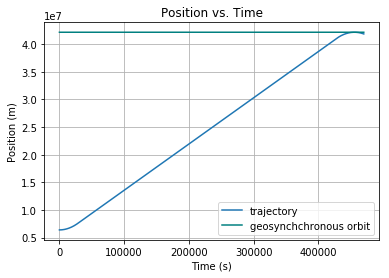

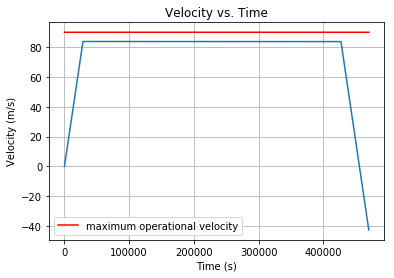

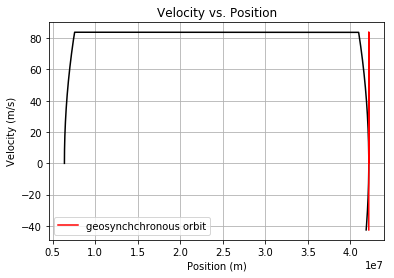

In [11]:
title('Position vs. Time')
grid()
plot(time, fSoln[:,0], label='trajectory')
plot(time, [geostationary for i in range(len(time))], color = 'teal', label='geosynchchronous orbit')
xlabel('Time (s)')
ylabel('Position (m)')
legend()

figure()
grid()
title('Velocity vs. Time')
plot(time, fSoln[:,1])
plot(time, [90 for i in range(len(time))], color = 'red', label='maximum operational velocity')
xlabel('Time (s)')
ylabel('Velocity (m/s)')
legend()

figure()
grid()
title('Velocity vs. Position')
plot(fSoln[:,0], fSoln[:,1], color = 'black')
plot ([geostationary for i in range(len(fSoln[:,0]))], fSoln[:,1], color = 'red', label='geosynchchronous orbit')
xlabel('Position (m)')
ylabel('Velocity (m/s)')
legend()


### Determining the Energy and Power required for the System

The main question of this experiment is to determine the Total Energy, Power and Work required for the Space Elevator to travel into orbit. 

Max power 5828518.786743164
Average power 1127016.9969144326


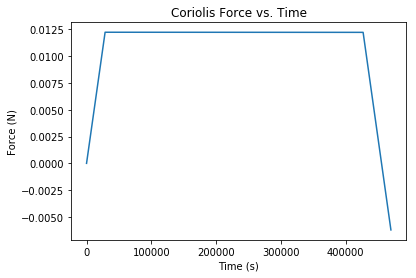

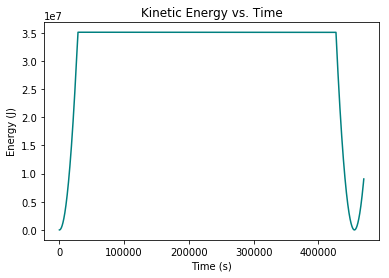

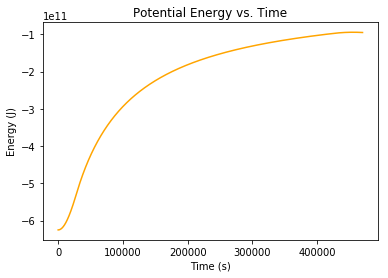

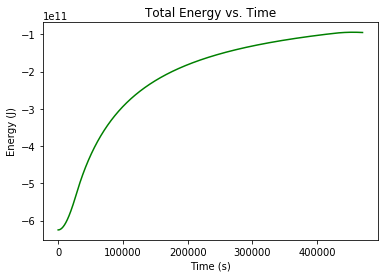

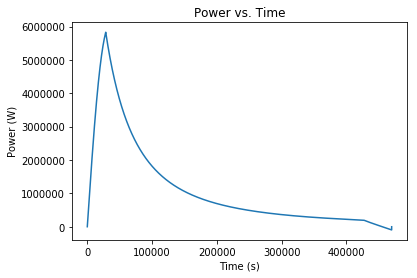

In [13]:
#Energy Equations
KE = 1/2*massC*(fSoln[:,1])**2
PE = -G*massE*massC/(fSoln[:,0])
TE = KE + PE

figure()
title('Coriolis Force vs. Time')
ylabel('Force (N)')
xlabel('Time (s)')
plot(time, 2*omegaE*fSoln[:,1])

figure()
title('Kinetic Energy vs. Time')
xlabel('Time (s)')
ylabel('Energy (J)')
plot(time, KE, color='teal', label='Kinetic Energy')

figure()
title('Potential Energy vs. Time')
xlabel('Time (s)')
ylabel('Energy (J)')
plot(time, PE, color='orange', label='Potential Energy')

figure()
title('Total Energy vs. Time')
xlabel('Time (s)')
ylabel('Energy (J)')
plot(time, TE, color='green', label='Total Energy')


#Power Equations
i = 1
topTE = []
botTE = []
while i < len(TE):
    topTE.append(TE[i])
    botTE.append(TE[i-1])
    i = i+1

power = []
for i in range(len(topTE)):
    power.append(topTE[i]-botTE[i])

power.append(0)

figure()
title('Power vs. Time')
xlabel('Time (s)')
ylabel('Power (W)')
plot(time, power)


print('Max power',max(power))
print('Average power',mean(power))